<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/MetaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the file with the combined data of both the hospitals and  splitting it into 2 parts

combined = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data_part1.csv', index=False)

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data_part2.csv', index=False)

In [4]:
# importing the test and training data

df_train = pd.read_csv('data_part1.csv')
df_test = pd.read_csv('data_part2.csv')

In [5]:
df_train.head(20)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [6]:
# let's list down all the different columns

df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [7]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [8]:
# Function to draw correlation heat map

def corr_matrix(df_train):
  corr = df_train.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# Percentage of null values present in all the parameters

null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

EtCO2               100.000000
TroponinI            99.877881
Bilirubin_direct     99.850420
Fibrinogen           99.236917
Bilirubin_total      98.773372
Alkalinephos         98.540650
AST                  98.504205
Lactate              96.565112
PTT                  95.152459
SaO2                 95.044387
Calcium              95.024392
Phosphate            94.951247
Platelets            93.482913
Creatinine           93.357884
WBC                  92.489639
Magnesium            92.219712
HCO3                 91.949406
BUN                  91.840702
Chloride             91.676063
PaCO2                91.231753
Hgb                  91.164303
BaseExcess           89.574863
Potassium            89.137640
pH                   88.532868
Hct                  88.223711
Glucose              87.768392
FiO2                 85.807027
Temp                 66.224255
Unit1                48.868346
Unit2                48.868346
DBP                  48.125763
SBP                  15.211177
O2Sat   

In [10]:
# the features have been removed based on the number of null values and redundancy

# 'Unnamed: 0'-- this is the index column
# 'SBP' -- MAP is considered instead of SBP and DBP
# 'DBP' -- MAP is considered instead of SBP and DBP
# 'EtCO2' -- It is not readily. available and also not available in the dataset
# 'BaseExcess' -- It is an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'HCO3' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'pH' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PaCO2' -- It is an indicator of respiratory health of an individual, we are considering SaO2 and FiO2 which are more readily avaiilable
# 'Alkalinephos' -- It is an indicator of the health of the liver of an individual, but we are considering Bilirubin instead of this, as data of this is more scarce.
# 'Calcium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Magnesium' -- It is an indicator of metabolism and kidney health, but we are considering Lactate instead as it is more readily available
# 'Phosphate' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Potassium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PTT' -- It is used to check inflammation. We are using WBC counts instead as it is easy to obtain.
# 'Fibrinogen' -- It is used to check blood clotting ability. We are using Platelets instead, as it is easier to obtain.
# 'Unit1' -- Both the columns Unit1 and Unit2 have been merged to form a single column.
# 'Unit2' -- Both the columns Unit1 and Unit2 have been merged to form a single column.

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

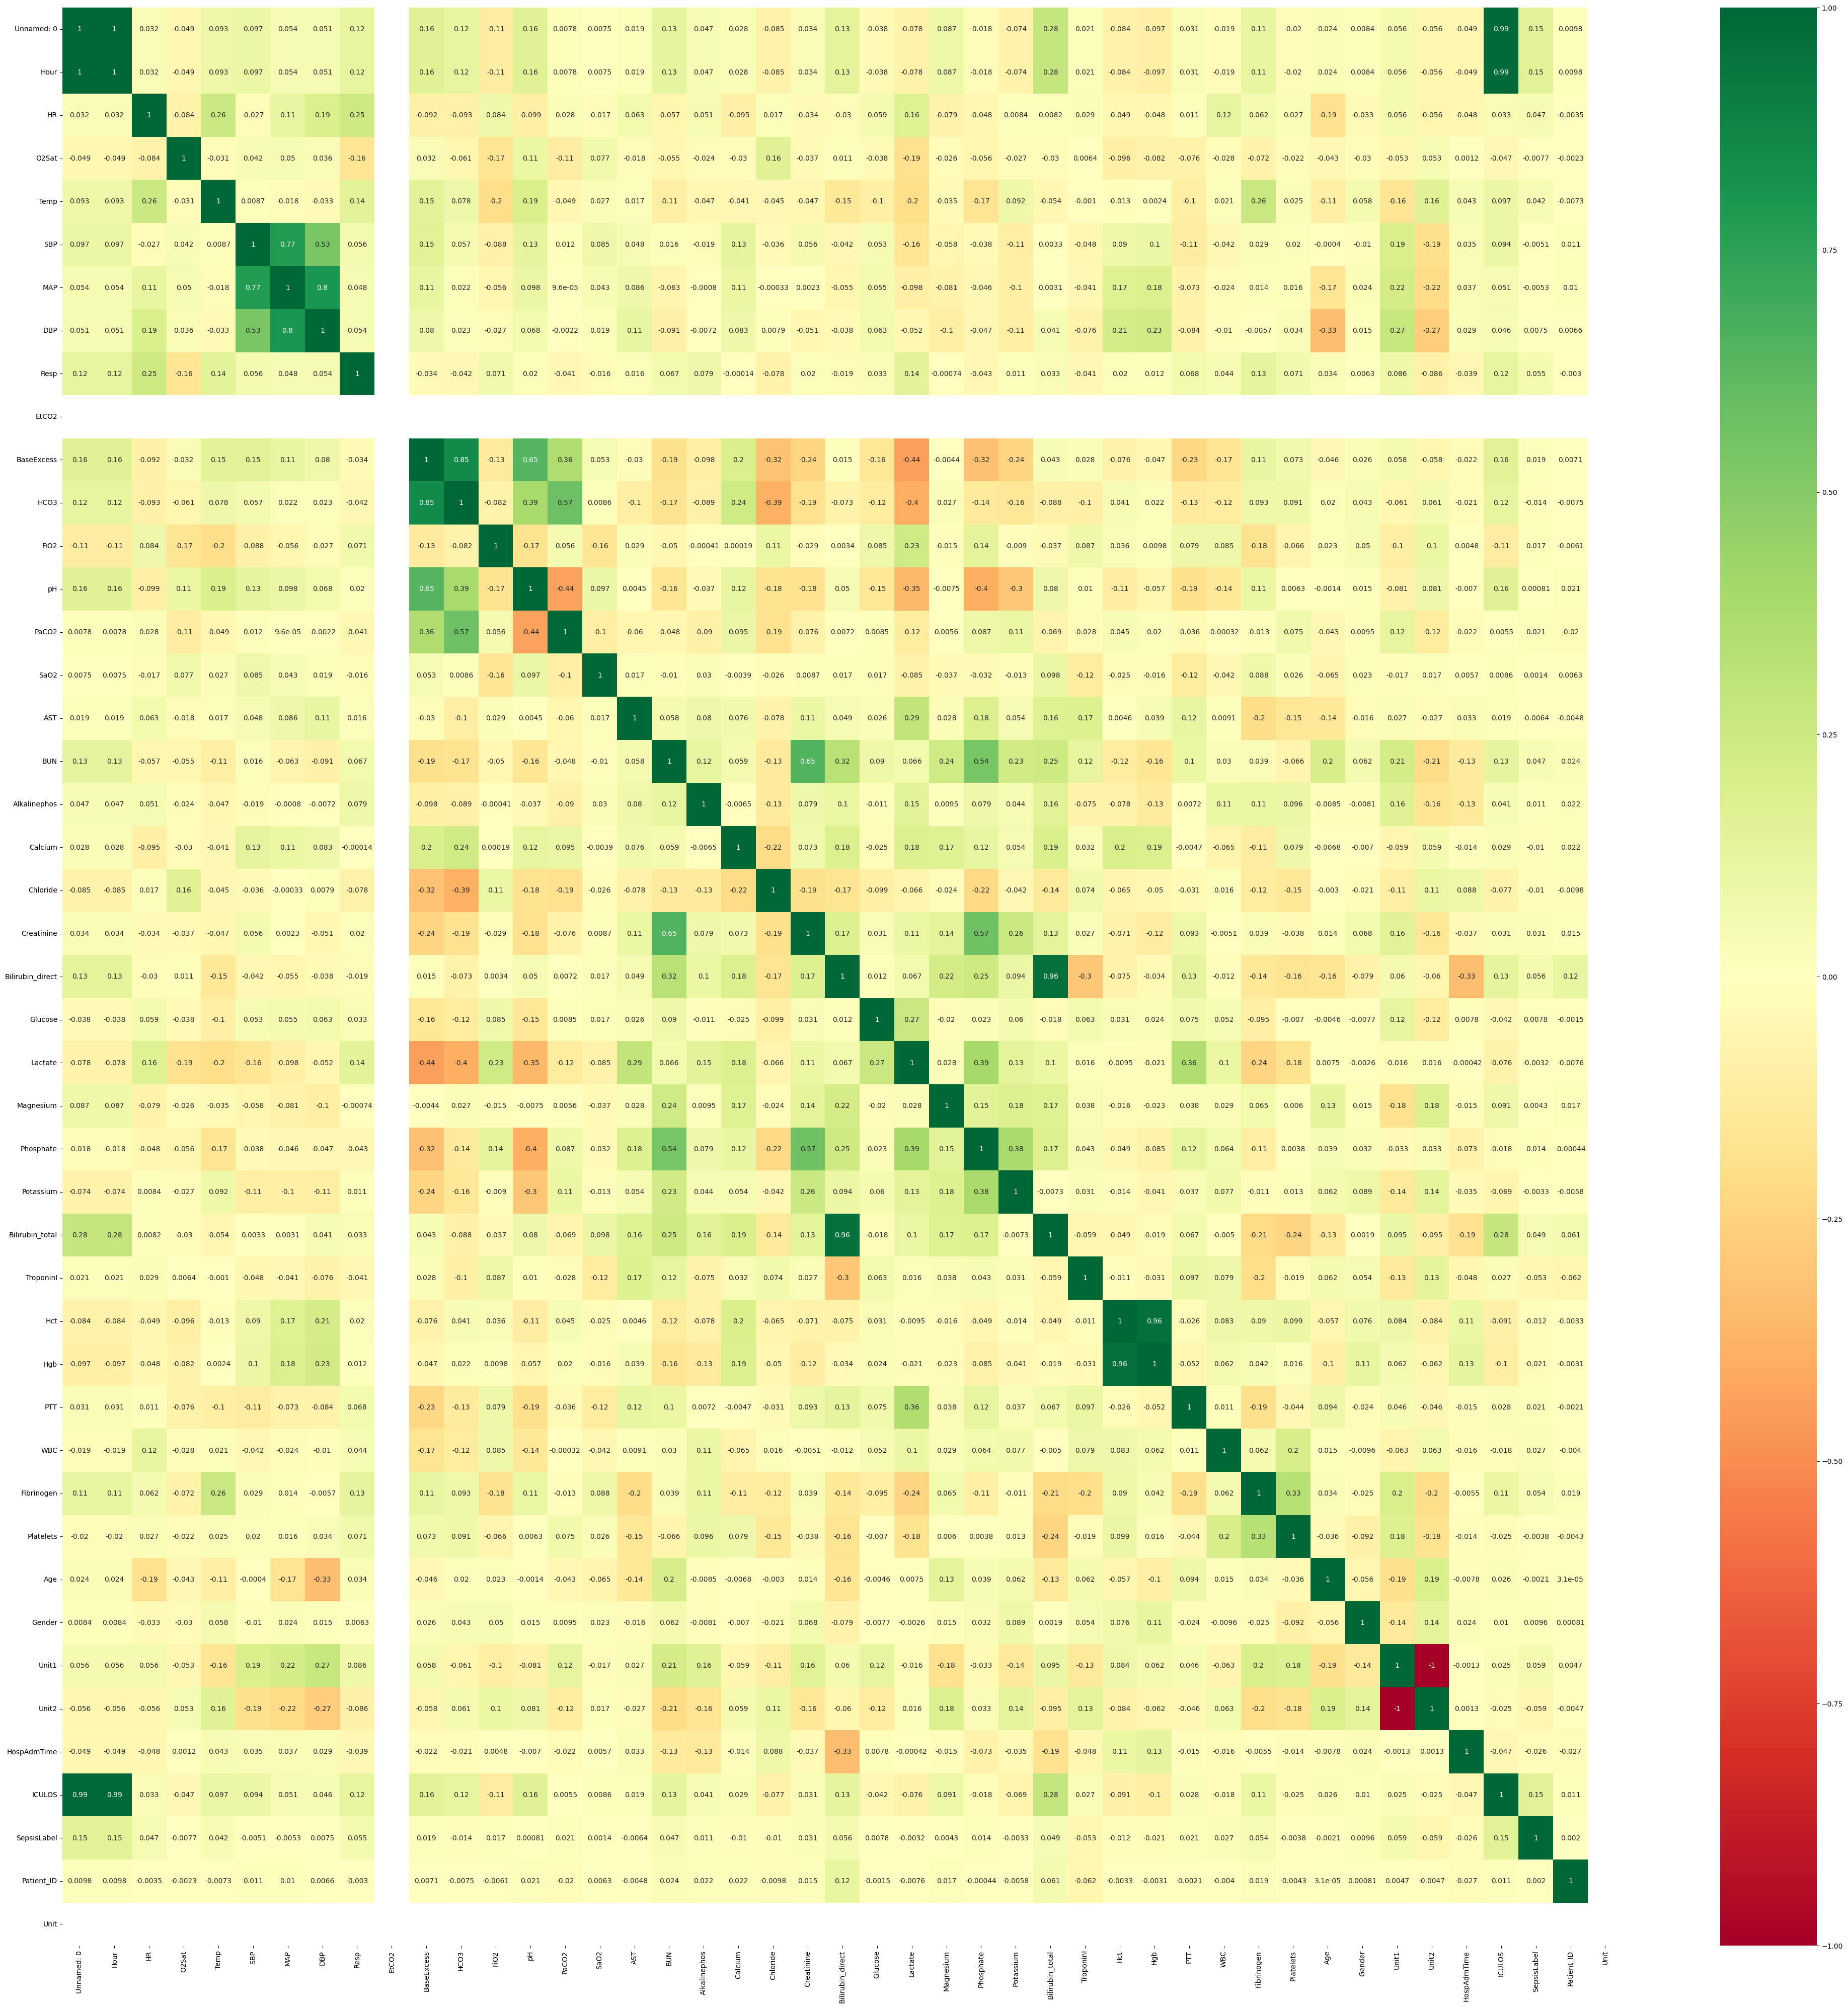

In [11]:
# correlation matrix to check if there is high correlation between the remaining features

#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [12]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [13]:
# bfill and ffill for imputing

grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

<ipython-input-13-630336680b91>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [14]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [15]:
# Now let's check the remaining proportion of missing values

null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

TroponinI           97.357934
Bilirubin_direct    96.256841
Bilirubin_total     66.949754
AST                 66.435590
SaO2                57.282891
Lactate             55.997418
Unit                48.868346
FiO2                36.195592
WBC                  1.511994
Platelets            1.394810
Chloride             1.310656
Hgb                  1.158672
Creatinine           1.029467
Glucose              0.940630
BUN                  0.937719
Temp                 0.853692
Hct                  0.779028
Resp                 0.088710
O2Sat                0.026702
MAP                  0.003037
HR                   0.001139
HospAdmTime          0.001012
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
Hour                 0.000000
dtype: float64

In [16]:
# dropping all the columns with null values more than 25% and patient_id

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [17]:
# onehot encoding the gender

one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)

In [18]:
# function to draw histogram and QQ plot

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [19]:
# function to apply different transformations to make the plot gaussian

def try_gaussian(df, col):
  print('actual plot')
  diagnostic_plots(df,col)
  # this applies yeojohnson plot
  df['col_yj'], param = stats.yeojohnson(df[col])
  print('yeojohnson plot')
  diagnostic_plots(df, 'col_yj')
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  print('**1/1.5 plot')
  diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  print('**.5 plot')
  # this applies inverse transformation
  diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001)
  diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  diagnostic_plots(df, 'col_log')

O2Sat
actual plot


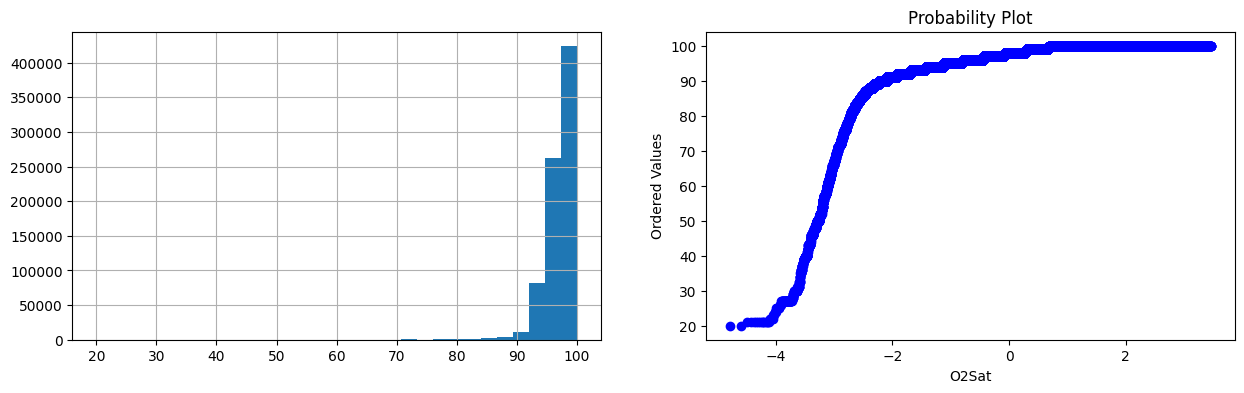

BracketError: ignored

In [20]:
# try normal distribution
# Now we try to check the distribution of values present in different columns after application of various transformations

lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in lst:
  print(i)
  try_gaussian(df_train_impute, i)

In [21]:
# after application of the above code, some redundant columns got added to the dataframe, which are removed through this line of code

df_train_impute = df_train_impute.drop(columns = ['col_yj','col_1.5','col_.5','col_rec','col_log'])

KeyError: ignored

In [22]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,1,0,1,0
1,1,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,2,0,1,0
2,2,78.0,100.0,35.78,42.5,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,3,0,1,0
3,3,73.0,100.0,35.78,74.0,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,4,0,1,0
4,4,70.0,100.0,35.78,74.0,14.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,5,0,1,0


In [23]:
# by oserving different plots, it can be concluded that only log was somewhat effective and that too for MAP, BUN, Creatinine, Glucose, WBC & Plateletes
# therefore applying log transformations on the above columns

columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [24]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,1,0,1,0
1,1,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,2,0,1,0
2,2,78.0,100.0,35.78,3.772761,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,3,0,1,0
3,3,73.0,100.0,35.78,4.317488,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,4,0,1,0
4,4,70.0,100.0,35.78,4.317488,14.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,5,0,1,0


In [25]:
# standard normalization

scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,1,0,1,0
1,1,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,2,0,1,0
2,2,-0.407913,0.865243,-1.548869,-3.187955,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,3,0,1,0
3,3,-0.701035,0.865243,-1.548869,-0.251970,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,4,0,1,0
4,4,-0.876908,0.865243,-1.548869,-0.251970,-0.883265,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,5,0,1,0


In [26]:
df_train_impute = df_train_impute.dropna()

In [27]:
null_values = df_train_impute.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
0              0.0
1              0.0
dtype: float64

**Model Building**

In [28]:
# this function will transform the dataframe (for final testing) in the compatible
# format for the input of the model
# this will make it easier to get the dataframe ready in a single go for prediction

def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [29]:
# this fucntion calculates different evaluation parameters of a model

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [30]:
# checking the distribution of data points between the two classes

majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


In [31]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

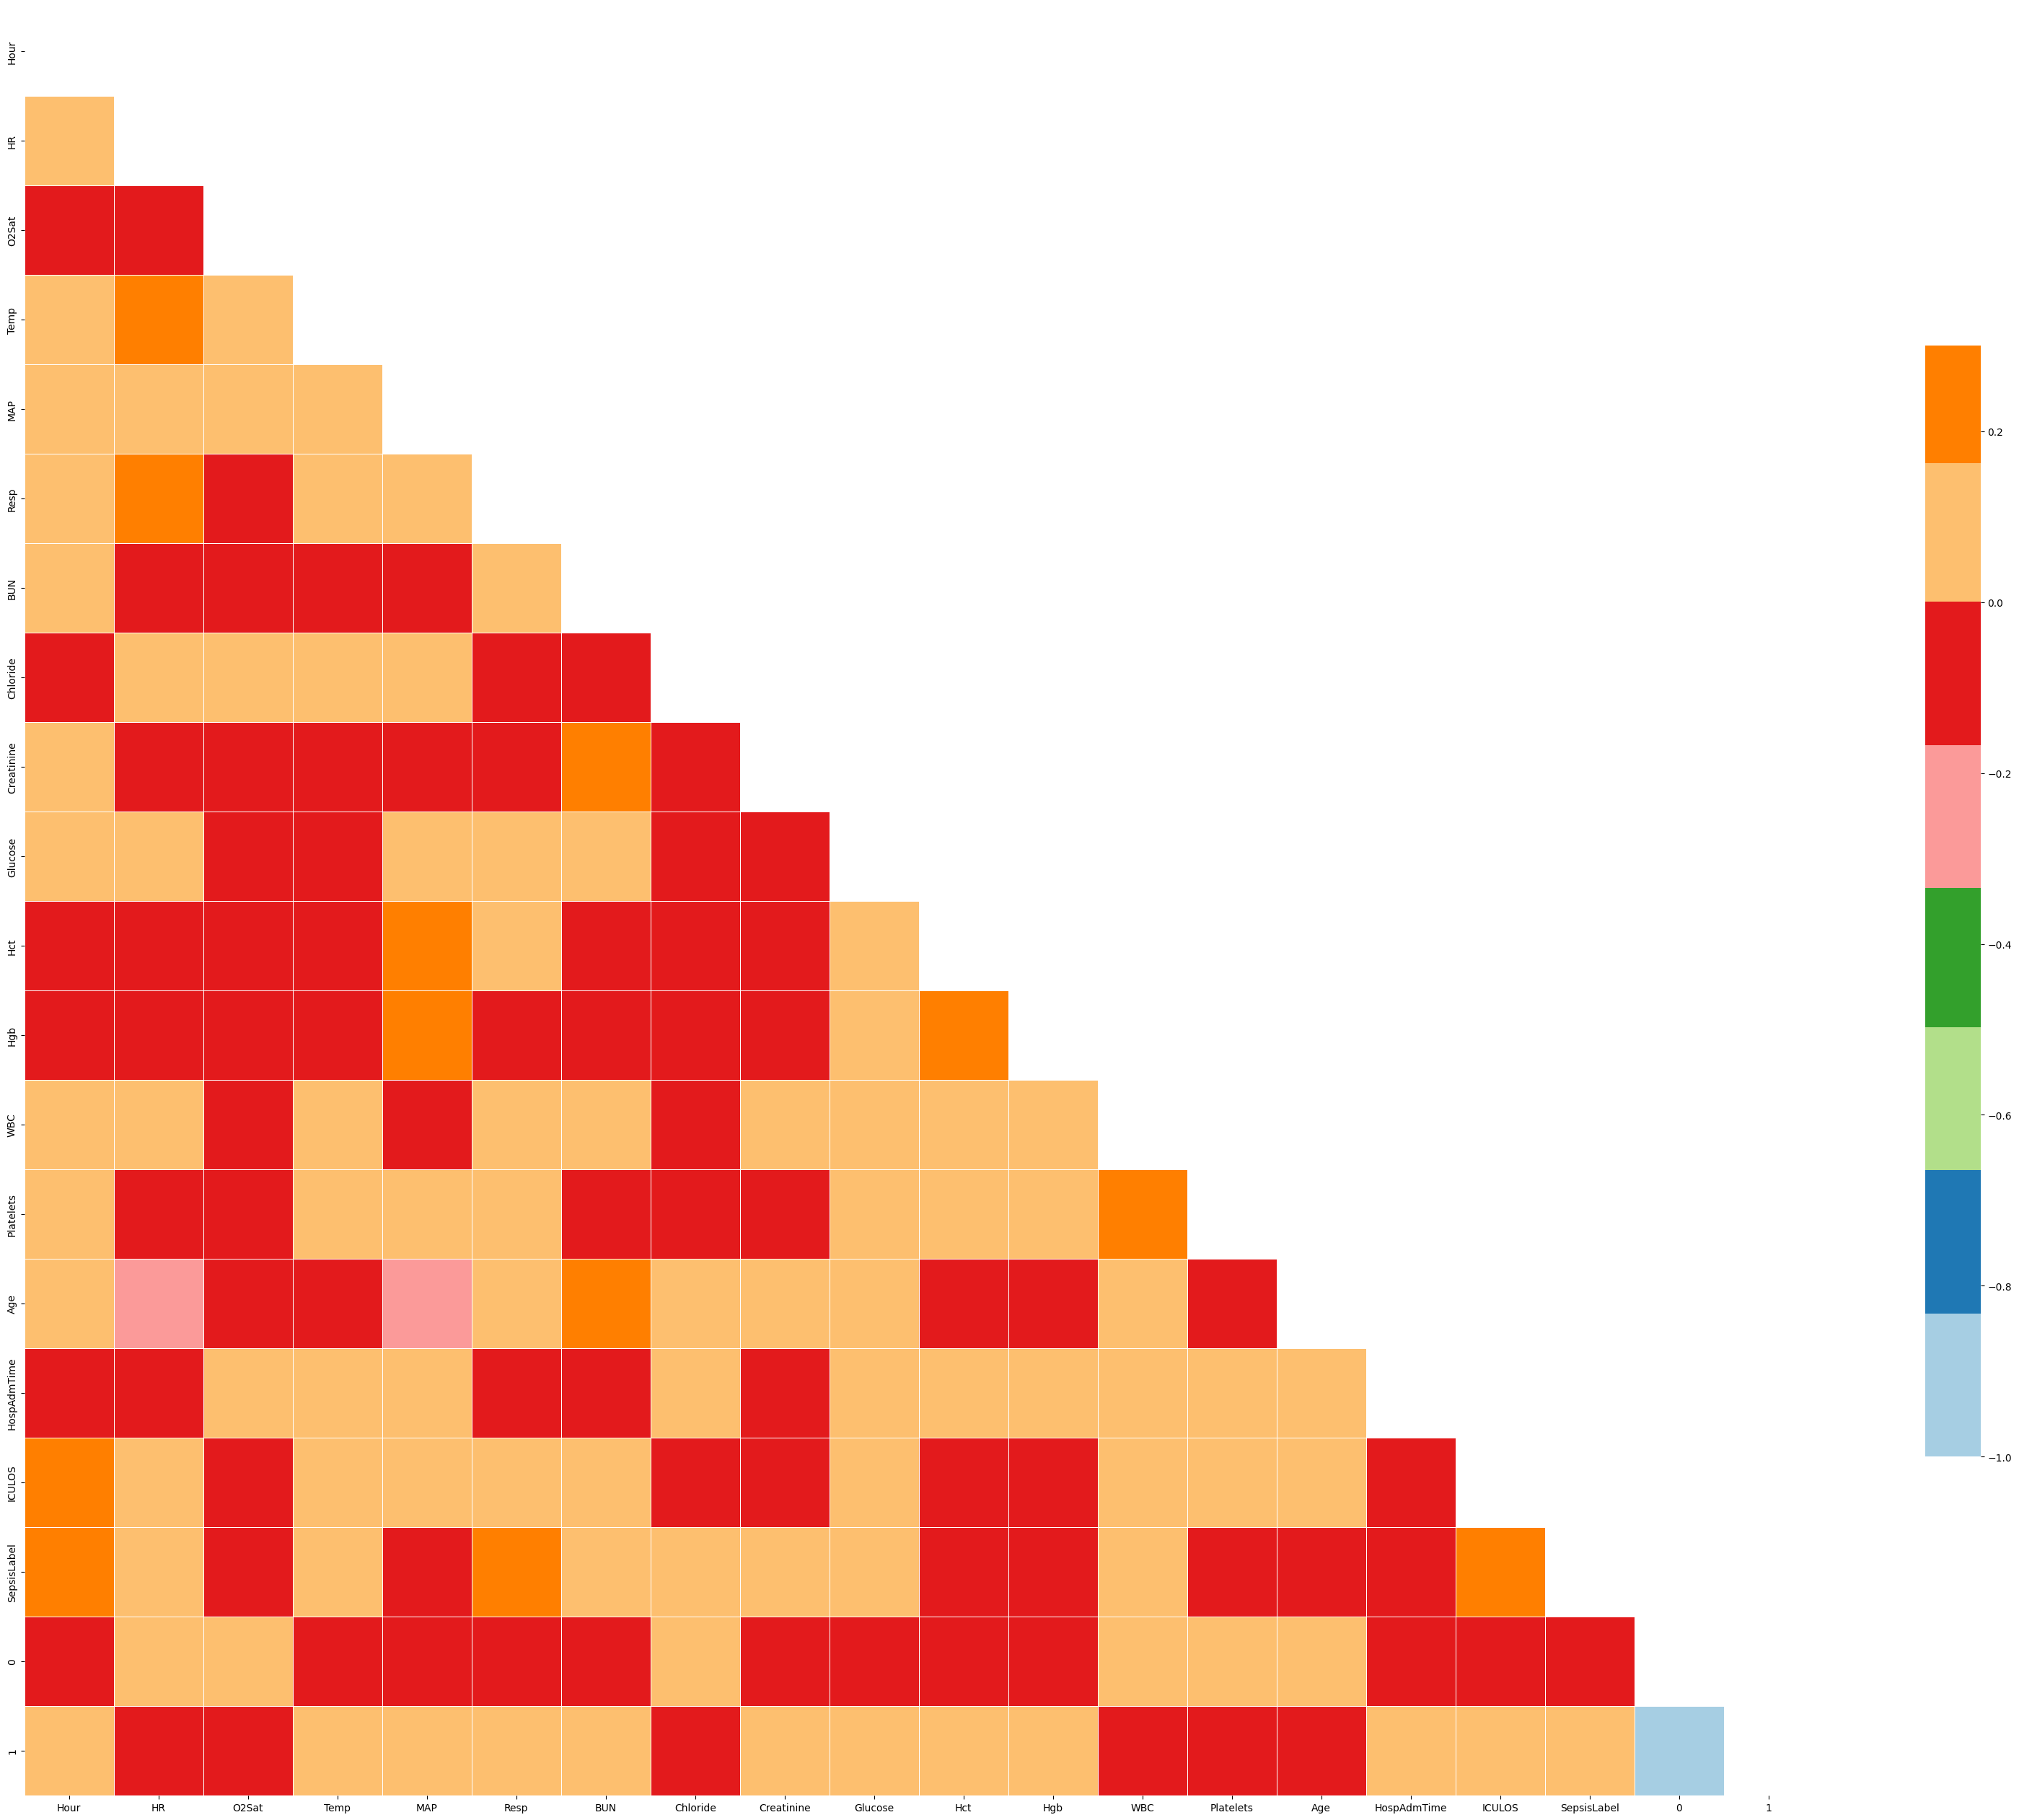

In [32]:
corr_matrix(df_train_impute)

In [33]:
# train test split for the imputed output
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
df_train_impute.shape

(45852, 20)

In [35]:
X.shape

(45852, 19)

In [36]:
y.shape

(45852,)

In [37]:
X_train.shape

(36681, 19)

In [38]:
y_train.shape

(36681,)

In [39]:
 y_test.shape

(9171,)

In [40]:
y_test

338700    0
377798    0
363723    0
504324    0
308194    0
         ..
209686    1
174466    0
341816    0
734652    0
478683    0
Name: SepsisLabel, Length: 9171, dtype: int64

رندوم فارست معمولی

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train, X_test, y_train, y_test

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define and fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Make predictions
rfc_predictions = model.predict(X_test)


**Randomforest**

Accuracy: 0.9598735143386763
Precision: 0.923297262889879
Recall: 0.9580581241743725
F1 Score: 0.940356564019449
AUC-ROC: 0.9594132391993464
Mean Absolute Error: 0.040126485661323735
Root Mean Squared Error: 0.20031596456928671


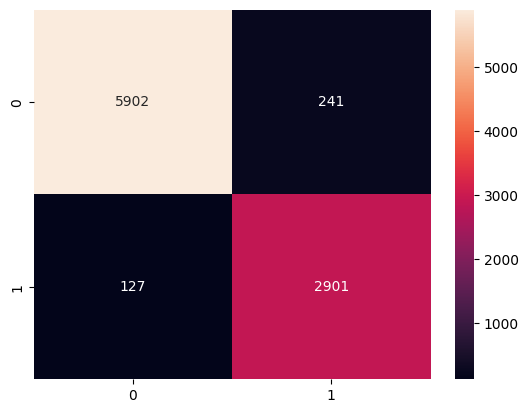

In [42]:
evaluate_model(y_test,rfc_predictions)

رندوم فارست احتمالاتی

In [43]:

rf_model = RandomForestClassifier(n_estimators=300, random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [44]:
rf_predictions = rf_model.predict_proba(X_test)[:, 1]


In [45]:
from sklearn.metrics import roc_auc_score

def evaluate_model(y_true, y_pred_probs):
    auc = roc_auc_score(y_true, y_pred_probs)
    print("AUC:", auc)

# Assuming you have already imported the necessary libraries and defined your rf_model and rf_predictions
evaluate_model(y_test, rf_predictions)


AUC: 0.9908664607566344


In [ ]:
ک  ان ان غیر احتمالاتی

**KNN**

In [46]:
# KNN Classifier
# KNN was tested on different values of k

from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=8)
# model = KNeighborsClassifier(n_neighbors=5)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
knn_predictions = model.predict(X_test)
evaluate_model(y_test,knn_predictions)

AUC: 0.785438275267292


**XGBoost**

In [47]:
# XGBoost
# XGBoost was run for different combinations of hyperparameters, but overall random forest classifier performed the best in terms of F1 score and other metrics

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic'}  # error evaluation for binary classification
num_round = 100
bst = xgb.train(param, dtrain, num_round)
xgb_predictions = bst.predict(dtest)
prediction = []
for i in xgb_predictions:
  if i<0.5:
    prediction.append(0)
  else:
    prediction.append(1)
evaluate_model(y_test,prediction)

[02:41:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

AUC: 0.8296353250609483


**Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DT_predictions = model.predict(X_test)
evaluate_model(y_test,DT_predictions)

AUC: 0.8939027968597824


**MLP**

In [49]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
MLP_predictions = model.predict(X_test)
evaluate_model(y_test,MLP_predictions)

AUC: 0.7351404257533626


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Generate dummy data


# Train your models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict_proba(X_test)[:, 1]
xgb_predictions = xgb_model.predict_proba(X_test)[:, 1]
dt_predictions = dt_model.predict_proba(X_test)[:, 1]

# Aggregate predictions using simple averaging
aggregated_predictions = (rf_predictions + xgb_predictions + dt_predictions) / 3

# Calculate the AUC for the aggregated predictions
aggregated_auc = roc_auc_score(y_test, aggregated_predictions)

print("AUC of Aggregated Predictions:", aggregated_auc)


AUC of Aggregated Predictions: 0.9828975360684832


I split the test data into two folds to make sure the model works correctly on unseen data.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_test is your DataFrame and y_test is your Series


# Define the fixed shape you want for each group
group_shape = len(X_test) // 2  # You can adjust this as needed

# Split the data into two groups
X_test_group1, X_test_group2, y_test_group1, y_test_group2 = train_test_split(
    X_test, y_test, test_size=group_shape, random_state=42)

# Now X_test_group1 and y_test_group1 contain the first group
# And X_test_group2 and y_test_group2 contain the second group


In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

# Generate dummy data


# Train your models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict_proba(X_test_group1)[:, 1]
xgb_predictions = xgb_model.predict_proba(X_test_group1)[:, 1]
dt_predictions = dt_model.predict_proba(X_test_group1)[:, 1]

# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions, xgb_predictions, dt_predictions))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

meta_model.fit(meta_features,y_test_group1, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_predictions = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test_group1, meta_predictions)

print("AUC of Meta-Ensemble Predictions:", meta_auc)


Epoch 1/50
115/115 [==============================] - 1s 4ms/step - loss: 0.5734 - accuracy: 0.8953 - val_loss: 0.4446 - val_accuracy: 0.9314
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.9343 - val_loss: 0.2397 - val_accuracy: 0.9477
Epoch 3/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9457 - val_loss: 0.1577 - val_accuracy: 0.9608
Epoch 4/50
115/115 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9517 - val_loss: 0.1249 - val_accuracy: 0.9662
Epoch 5/50
115/115 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9547 - val_loss: 0.1092 - val_accuracy: 0.9684
Epoch 6/50
115/115 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9580 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 7/50
115/115 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9586 - val_loss: 0.0953 - val_accuracy: 0.9695
Epoch 

In [ ]:
# Assuming you've trained your meta_model and have meta_features already defined

# Get predictions from each base model for the second group of test data
rf_predictions_group2 = rf_model.predict_proba(X_test_group2)[:, 1]
xgb_predictions_group2 = xgb_model.predict_proba(X_test_group2)[:, 1]
dt_predictions_group2 = dt_model.predict_proba(X_test_group2)[:, 1]

# Create a new dataset with the predictions as features for the second group
meta_features_group2 = np.column_stack((rf_predictions_group2, xgb_predictions_group2, dt_predictions_group2))

# Predict with the trained meta-ensemble model for the second group
meta_predictions_group2 = meta_model.predict(meta_features_group2)

# Calculate the AUC for the meta-ensemble predictions on the second group
meta_auc_group2 = roc_auc_score(y_test_group2, meta_predictions_group2)

print("AUC of Meta-Ensemble Predictions (Group 2):", meta_auc_group2)


144/144 [==============================] - 0s 2ms/step
AUC of Meta-Ensemble Predictions (Group 2): 0.9914623221886157


Epoch 1/50
230/230 [==============================] - 2s 4ms/step - loss: 0.4384 - accuracy: 0.8983 - val_loss: 0.2413 - val_accuracy: 0.9281
Epoch 2/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1825 - accuracy: 0.9449 - val_loss: 0.1416 - val_accuracy: 0.9591
Epoch 3/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1332 - accuracy: 0.9535 - val_loss: 0.1216 - val_accuracy: 0.9608
Epoch 4/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1210 - accuracy: 0.9562 - val_loss: 0.1135 - val_accuracy: 0.9613
Epoch 5/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9567 - val_loss: 0.1101 - val_accuracy: 0.9624
Epoch 6/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9576 - val_loss: 0.1082 - val_accuracy: 0.9629
Epoch 7/50
230/230 [==============================] - 1s 6ms/step - loss: 0.1101 - accuracy: 0.9580 - val_loss: 0.1040 - val_accuracy: 0.9635
Epoch 

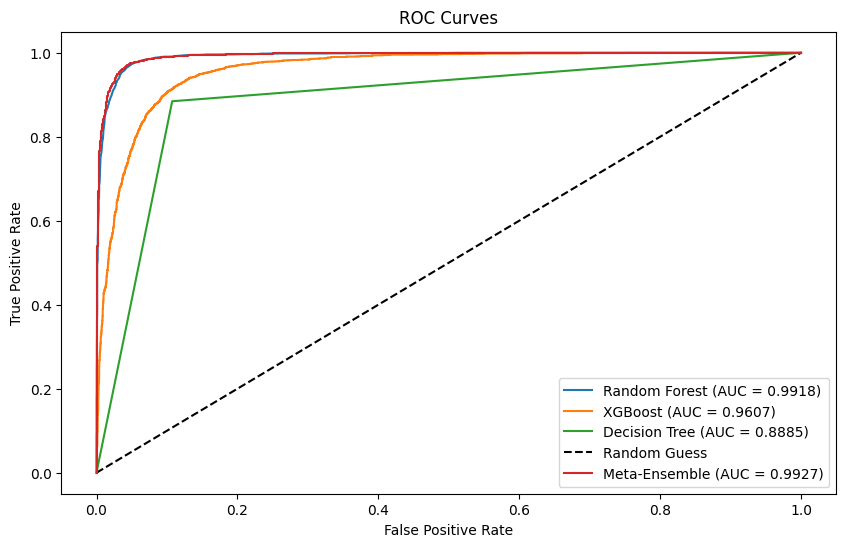

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense


rf_model = RandomForestClassifier(n_estimators=300, random_state=0)

rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict_proba(X_test)[:, 1]
xgb_predictions = xgb_model.predict_proba(X_test)[:, 1]
dt_predictions = dt_model.predict_proba(X_test)[:, 1]

# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions, xgb_predictions, dt_predictions))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

meta_model.fit(meta_features, y_test, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_predictions = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test, meta_predictions)
print("AUC of Meta-Ensemble Predictions:", meta_auc)

# Calculate the ROC curve and AUC for each individual model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
meta_fpr, meta_tpr, _ = roc_curve(y_test, meta_predictions)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, rf_predictions)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, xgb_predictions)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, dt_predictions)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(meta_fpr, meta_tpr, label='Meta-Ensemble (AUC = {:.4f})'.format(meta_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


کد زیر فقط رندوم فارست رو به حالت احتمالاتی حساب نکردم واسه همین دقتش اومده پایین اما ایکس جی بوست و دیسیژن تری رو احتملاتی حساب کردم و دقتاش بالاست....یعنی رندوم فارستشو مثل تو کد زدم دقت کنی

Epoch 1/50
230/230 [==============================] - 2s 4ms/step - loss: 0.4118 - accuracy: 0.9310 - val_loss: 0.2129 - val_accuracy: 0.9635
Epoch 2/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1741 - accuracy: 0.9591 - val_loss: 0.1448 - val_accuracy: 0.9635
Epoch 3/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9591 - val_loss: 0.1399 - val_accuracy: 0.9635
Epoch 4/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1483 - accuracy: 0.9591 - val_loss: 0.1377 - val_accuracy: 0.9635
Epoch 5/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1468 - accuracy: 0.9591 - val_loss: 0.1358 - val_accuracy: 0.9635
Epoch 6/50
230/230 [==============================] - 1s 5ms/step - loss: 0.1457 - accuracy: 0.9591 - val_loss: 0.1360 - val_accuracy: 0.9635
Epoch 7/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.9591 - val_loss: 0.1351 - val_accuracy: 0.9635
Epoch 

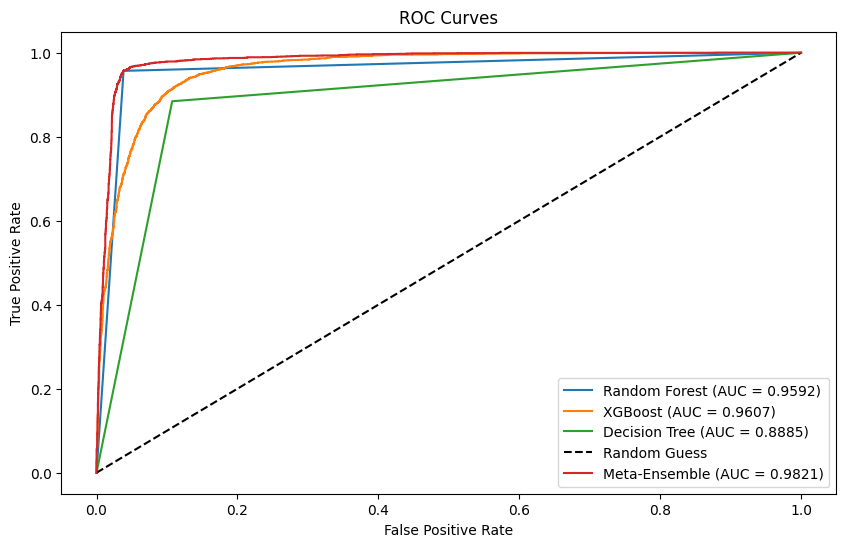

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense



# Make predictions


rf_model = RandomForestClassifier(n_estimators=300, random_state=0)

rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict(X_test)

xgb_predictions = xgb_model.predict_proba(X_test)[:, 1]
dt_predictions = dt_model.predict_proba(X_test)[:, 1]

# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions, xgb_predictions, dt_predictions))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

meta_model.fit(meta_features, y_test, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_predictions = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test, meta_predictions)
print("AUC of Meta-Ensemble Predictions:", meta_auc)

# Calculate the ROC curve and AUC for each individual model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
meta_fpr, meta_tpr, _ = roc_curve(y_test, meta_predictions)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, rf_predictions)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, xgb_predictions)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, dt_predictions)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(meta_fpr, meta_tpr, label='Meta-Ensemble (AUC = {:.4f})'.format(meta_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


کد زیرم هیچکدوم رو احتمالاتی محاسبه نکردم و نتایج رو میتونی ببینی

Epoch 1/50
230/230 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.9196 - val_loss: 0.2397 - val_accuracy: 0.9657
Epoch 2/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1856 - accuracy: 0.9584 - val_loss: 0.1386 - val_accuracy: 0.9657
Epoch 3/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9584 - val_loss: 0.1324 - val_accuracy: 0.9657
Epoch 4/50
230/230 [==============================] - 1s 2ms/step - loss: 0.1486 - accuracy: 0.9584 - val_loss: 0.1288 - val_accuracy: 0.9657
Epoch 5/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9584 - val_loss: 0.1303 - val_accuracy: 0.9657
Epoch 6/50
230/230 [==============================] - 1s 2ms/step - loss: 0.1474 - accuracy: 0.9584 - val_loss: 0.1302 - val_accuracy: 0.9657
Epoch 7/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9584 - val_loss: 0.1307 - val_accuracy: 0.9657
Epoch 

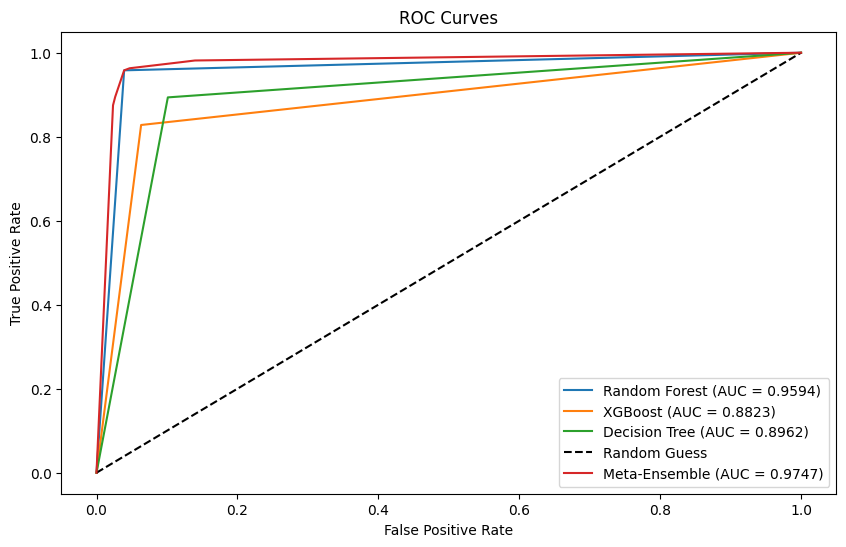

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense



# Make predictions


rf_model = RandomForestClassifier(n_estimators=300, random_state=0)

rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict(X_test)

xgb_predictions = xgb_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions, xgb_predictions, dt_predictions))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

meta_model.fit(meta_features, y_test, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_predictions = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test, meta_predictions)
print("AUC of Meta-Ensemble Predictions:", meta_auc)

# Calculate the ROC curve and AUC for each individual model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
meta_fpr, meta_tpr, _ = roc_curve(y_test, meta_predictions)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, rf_predictions)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, xgb_predictions)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, dt_predictions)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(meta_fpr, meta_tpr, label='Meta-Ensemble (AUC = {:.4f})'.format(meta_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


در مجموع میتونی یا احتمالاتی و یا غیر احتمالاتی نتایجت رو توی مقاله بیاری...یکیشون باید بیاد پیشنهاد من ااحتمالاتیه که رندوم فارستت ۹۹ درصد شده و مدل متا هم همونه فقط یه کوچولو بیشتر شده

In [55]:
import pandas
from sklearn import model_selection
import pickle

# save the random forest model to disk
filename1 = 'finalized_rfmodel.sav'
pickle.dump(rf_model, open(filename1, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9598735143386763


In [56]:
# save the xgb model to disk
filename2 = 'finalized_xgbmodel.sav'
pickle.dump(xgb_model, open(filename2, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename2, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9007741794787918


In [59]:
# save the DT model to disk
filename3 = 'finalized_dtmodel.sav'
pickle.dump(dt_model, open(filename3, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename3, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8970668411296479
